<a href="https://colab.research.google.com/github/feliperamosn/Mudancas-Climaticas-Litoral-Paulista/blob/main/Analise_Balneabilidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Espacial da Balneabilidade no Litoral Paulista

*Trabalho inicialmente apresentado como atividade de disciplina de Introdução à Programação de Especialização em Geoprocessamento na UFABC em dez/2024. Algumas modificações foram feitas por mim (Felipe Ramos) para publicação neste repositório, apenas para deixar o estudo um pouco mais objetivo.*

Felipe Ramos Neves - Polo Jandira/SP

Giuliana Andréia Sfreddo - Polo Turvo/PR

Luiz Miguel Dias Valino - Polo Peruíbe/SP

Robson A. Ribeiro - Polo Apiaí/SP

# 1. Justificativa

A linha costeira paulista, com sua densidade populacional elevada, infraestrutura urbana significativa e atividades econômicas essenciais, está entre as regiões mais vulneráveis aos riscos associados à erosão e à inundação. Esses fenômenos, frequentemente intensificados por fatores como o aumento do nível do mar e a dinâmica costeira alterada, representam uma ameaça concreta à estabilidade territorial, às populações locais e às operações portuárias.

Dados do Instituto Oceanográfico da USP indicam que o nível do mar no estado de São Paulo subiu pelo menos 20 centímetros nos últimos 73 anos, com projeções de aumento de até 36 centímetros até 2050, caso as emissões de dióxido de carbono não sejam reduzidas. A Organização das Nações Unidas (ONU) estima que a cidade de Santos possa perder até 5% de sua área habitável até esse mesmo horizonte de tempo. Além disso, a frequência e intensidade de ressacas e inundações costeiras têm crescido, gerando impactos que vão desde o alagamento de áreas urbanas até a interrupção de operações portuárias vitais, como as do Porto de Santos (Becker et al., 2018). Os estudos de Gouveia Souza (2021) sobre a dinâmica costeira e os perigos hidrometeorológicos são de grande relevância, pois oferecem uma base importante para a compreensão dos impactos das mudanças climáticas na região.

Diante desse cenário, é de suma importância compreender a distribuição espacial e a magnitude dos riscos de erosão e inundação ao longo do litoral paulista. Nesse sentido, este projeto busca contribuir para essa compreensão ao realizar uma análise comparativa entre diferentes trechos costeiros, com ênfase na Baixada Santista, utilizando dados georreferenciados de fontes relevantes como a classificação de balneabilidade realizada pela CETESB, espera-se não apenas identificar as áreas mais vulneráveis, mas também fornecer subsídios para o planejamento e a gestão costeira na região, fortalecendo a capacidade de resposta frente aos desafios atuais e futuros.

# 2. Objetivos

O objetivo principal deste projeto é criar um dataframe no Python que armazene informações da linha costeira paulista, subdividida por municípios e pelas praias que a compõem, classificando essas áreas com base na avaliação da balneabilidade. Por meio desse dataframe, buscamos realizar uma análise comparativa entre a região da Baixada Santista e o restante do litoral paulista. Essa análise tem como propósito identificar e destacar as áreas críticas, contribuindo para a priorização de ações de gestão costeira.

Além disso, pretendemos gerar visualizações que representem de forma intuitiva os níveis de risco ao longo do litoral, possibilitando uma interpretação acessível dos resultados. Por fim, queremos identificar padrões espaciais na distribuição dos riscos, como trechos de praia ou municípios com maior concentração de áreas vulneráveis, e explorar potenciais relações com fatores socioeconômicos ou geográficos, a fim de concluir sobre a vulnerabilidade costeira na região.

Esses objetivos serão alcançados por meio dos entregáveis descritos, dentro do prazo de duas semanas, e poderão servir como base para estudos futuros, iniciativas de planejamento costeiro e para o aprofundamento do tema do nosso trabalho de conclusão de curso nesta especialização. Nosso TCC visa compreender os impactos climáticos e a vulnerabilidade costeira, com foco nas variações da dinâmica costeira do litoral de Santos - SP.

# 3. Definição dos Dados e Metodologia

O projeto será desenvolvido utilizando a linguagem de programação Python, com destaque para o uso das bibliotecas geopandas, destinada à manipulação de dados geoespaciais, e pandas, para o tratamento de dados tabulares. Os dados georreferenciados necessários para a análise incluem os limites municipais do litoral paulista, disponibilizados pelo IBGE, e os os dados coletados pela CETESB de balneabiliade de praias litorâneas em 2020. Inicialmente, será realizado o download, carregamento e o pré-processamento desses dados, incluindo etapas de limpeza e de padronização que forem necessária. Posteriormente, será feita a integração dos dados de risco com os limites municipais, o que permitirá a criação de visualizações que evidenciem as regiões mais afetadas. Além disso, será conduzida uma análise descritiva para explorar e interpretar as diferenças espaciais nas praias mais críticas entre os municípios costeiros.

 De acordo com metadados do indicador de Balneabilidade utilizado, a CETESB possui 167 pontos de avaliação de balneabilidade no litoral de São Paulo, onde semanalmente são coletadas amostras de água para análise em laboratório. A classificação semanal de uma praia é feita de acordo com as densidades de bactérias fecais na água do mar. Se essas forem superiores a 100 UFC/100 mL, em duas ou mais amostras de um conjunto de cinco semanas, ou apresentar valor superior a 400 UFC/100 mL na última amostragem fica caracterizada a impropriedade da praia para recreação de contato primário. Vale ressaltar que, mesmo que uma praia apresente baixas densidades de bactérias fecais, ela pode ser classificada na categoria Imprópria quando ocorrerem situações que justificavam a contraindicação de recreação de contato primário, como pela a presença de óleo provocada por derramamento acidental de petróleo, pela ocorrência de maré vermelha, pela floração de algas potencialmente tóxicas ou surtos de doenças de veiculação hídrica.

# 4. Desenvolvimento do projeto

## 4.1 Carregamento dos dados

1) Importação das Bibliotecas Pandas, Geopandas e Folium

2) Acesso aos arquivos do Google Drive

3) Criação de GeoDataFrames para armazenar os dados de **Balneabilidade das praias do litoral paulista**.

Criação de um outro DataFrame para armazenar os limites dos municípios disponíveis no IBGE.

4) Conferência do sistema de projeção e impressão das primeiras linhas

In [1]:
import pandas as pd
import geopandas as gpd
import folium

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
gdf_municipios = gpd.read_file('/content/drive/MyDrive/Geoprocessamento/IntroProg/SP_Municipios_2022/SP_Municipios_2022.shp')
gdf_praias = gpd.read_file('/content/drive/MyDrive/Geoprocessamento/IntroProg/VWM_BALNEABILIDADE_CETESB_2020_PTO/VWM_BALNEABILIDADE_CETESB_2020_PTOPoint.shp')

Conferência das primeiras linhas do geodataframe

In [ ]:
# Trocar símbolo quando quiser visualizar as outras tabelas de atributos

gdf_praias.head()
#gdf_municipios.head()

,Codigo,Praia,Municipio,Classe,geometry
0,UBPC017,PICINGUABA,Ubatuba,Boa,POINT (-44.83803 -23.37811)
1,UBPR035,PRUMIRIM,Ubatuba,SEM CLASS,POINT (-44.95784 -23.37927)
2,UBFX042,FÉLIX,Ubatuba,Boa,POINT (-44.97173 -23.38916)
3,UBIM047,ITAMAMBUCA,Ubatuba,Boa,POINT (-45.00345 -23.40225)
4,UBRI050,RIO ITAMAMBUCA,Ubatuba,Péssima,POINT (-45.00934 -23.4061)


In [ ]:
print(gdf_praias.crs)  #Todos os GeoDataFrames estão na projeção EPSG:4674

EPSG:4674


## 4.2 Preparação dos dados

Criação de variável para armazenar os 16 municípios do litoral paulista e criação de filtragem com apenas os municípios do litoral, pois isso facilitará o tempo de processamento do arquivo na construção do gráfico.

In [4]:
cidades_litoral = ['Santos','Praia Grande','São Vicente','Guarujá','Caraguatatuba'
,'Itanhaém','Cubatão','Ubatuba','São Sebastião'
,'Peruíbe','Bertioga','Mongaguá','Ilhabela'
,'Iguape','Ilha Comprida','Cananéia']

cidades_baixada = ['Santos','Praia Grande','São Vicente','Guarujá','Itanhaém','Cubatão','Peruíbe','Bertioga','Mongaguá']

gdf_municipios_fil = gdf_municipios[gdf_municipios['NM_MUN'].isin(cidades_litoral)]

print(len(gdf_municipios_fil)) #Conferência se o número de munícipios da filtragem equivale ao que pretendido (pode ter problema de acentos)

gdf_municipios_fil.head()

#pd.set_option('display.max_colwidth', None)  # Permite mostrar todo o conteúdo de cada célula para checar se ponto inicial coincide com ponto final do polígono


16


,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
71,3506359,Bertioga,SP,491.546,"MULTIPOLYGON (((-46.00033 -23.80152, -46.00055..."
112,3509908,Cananéia,SP,1237.354,"MULTIPOLYGON (((-48.04157 -24.87116, -48.04185..."
120,3510500,Caraguatatuba,SP,484.947,"MULTIPOLYGON (((-45.31851 -23.5788, -45.31915 ..."
149,3513504,Cubatão,SP,142.879,"POLYGON ((-46.4373 -23.82924, -46.43723 -23.82..."
211,3518701,Guarujá,SP,144.794,"MULTIPOLYGON (((-46.13021 -23.86287, -46.13045..."


Outras preparações úteis, sobretudo quando realizar as junções de tabelas. Estão em comentário, porque não foram mais necessárias,  pois acabamos não realizando mais a junção com os dados de erosão depois de descobrir que tinham poucos preenchimentos.
1. Padroniza campo para maiúsculas
2. Remove espaços extras no final ou no começo
3. Remove acentos




In [ ]:
#gdf_municipios['NM_MUN'] = gdf_municipios['NM_MUN'].str.upper()

#gdf_municipios['NM_MUN'] = gdf_municipios['NM_MUN'].str.strip()

#import unicodedata
#def remove_acentos(texto):
#    return unicodedata.normalize('NFKD', texto).encode('ASCII', 'ignore').decode('utf-8')
#gdf_municipios['NM_MUN'] = gdf_municipios['NM_MUN'].apply(remove_acentos)

## 4.3 Realização de análises e visualização dos resultados

Primeira análise exploratória para verificar a qualidade das águas em cada praia: se as geometrias estão coincidindo o litoral paulista e como as classificações da avaliação de balneabilidade estão distribuídas por município.

166
Quantidade de praias por tipo de classificação de balneabilidade em cada município
Classe         Boa  Péssima  Regular  Ruim  SEM CLASS  Ótima
Municipio                                                   
Bertioga         6        0        2     0          0      1
Caraguatatuba    3        1        5     3          1      1
Cubatão          1        0        0     0          0      0
Guarujá          3        1        3     4          1      0
Iguape           0        0        0     0          1      0
Ilha Comprida    0        0        0     0          4      0
Ilhabela         3        4        7     5          0      0
Itanhaém         0        1        8     3          0      0
Mongaguá         0        4        1     2          0      0
Peruíbe          1        0        2     3          0      0
Praia Grande     0        4        1     7          0      0
Santos           0        5        0     2          0      0
São Sebastião    4        6       13     4          0      

<Axes: >

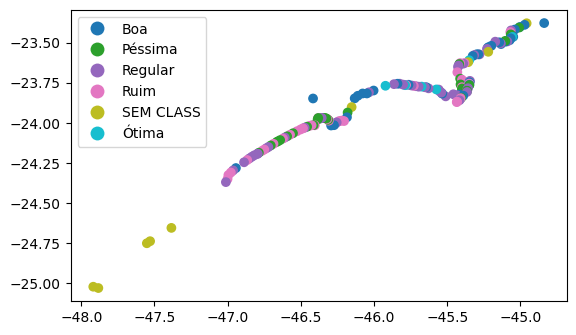

In [5]:
#gdf_municipios.plot()
#print(gdf_erosao.is_valid)

print(len(gdf_praias))

tabela_dinamica = pd.pivot_table(
    gdf_praias,
    values="geometry",  # para contar
    index="Municipio",  # Linhas
    columns="Classe",   # Colunas
    aggfunc="count",    # Contagem
    fill_value=0        # Substitui NaN por 0
)

# Exibir resultado
print('Quantidade de praias por tipo de classificação de balneabilidade em cada município')
print(tabela_dinamica)

tabela_percentual = tabela_dinamica.div(tabela_dinamica.sum(axis=1), axis=0) * 100

tabela_classificada = tabela_percentual.sort_values(by="Péssima", ascending=False)

print('Percentual de praias classificadas em cada categoria de avaliação de balneabilidade por município')
print(tabela_classificada)

print('Verificação de geometrias e análise preliminar da distribuição das classificações ao longo da linha do litoral')
gdf_praias.plot('Classe',legend= True)

In [6]:
# Criação da tabela com contagem de praias por classificação quanto à balneabilidade (dados CETESB 2020 do GeoDATA)
tabela_qualidade = gdf_praias['Classe'].value_counts().reset_index()

# Renomear colunas
tabela_qualidade.columns = ['Classificação - Balneabilidade (CETESB, 2020)', 'Quantidade de Praias']

# Ordenação por categoria
tabela_qualidade = tabela_qualidade.sort_values('Quantidade de Praias', ascending=False)

# Impressão tabela
print(tabela_qualidade)

  Classificação - Balneabilidade (CETESB, 2020)  Quantidade de Praias
0                                       Regular                    50
1                                          Ruim                    35
2                                           Boa                    34
3                                       Péssima                    32
4                                     SEM CLASS                     9
5                                         Ótima                     6


Construção de mapa interativo com os limites dos munícipios do litoral delimitados em vermelho e marcadores com as informações de balneabilidade de cada praia.

In [7]:
#Cálculo da latitude e longitude médias das geometrias no GeoDataFrame

latitude_central = gdf_praias.geometry.y.mean()
longitude_central = gdf_praias.geometry.x.mean()

# Imprimir as coordenadas centrais
print(latitude_central, longitude_central)
mapa_hid = folium.Map(location=[latitude_central, longitude_central], zoom_start=7, attr='ESRI World Imagery',tiles='http://services.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}')

#Definição de função para estilização a borda do polígono
def estilo_mun(ftr):
    # Retornar o estilo que será aplicado aos municípios.
    return({'color':'red', 'weight':1, 'fillColor':'purple'})

#Camada munícipio

municipios_json = gdf_municipios_fil.to_json()
municipios_ftrs = folium.features.GeoJson(
    municipios_json,
    name='municipio',
    tooltip=folium.features.GeoJsonTooltip(['NM_MUN', 'SIGLA_UF', 'AREA_KM2']),
    style_function=estilo_mun)

#Camada praias

praias_json = gdf_praias.to_json()

praias_ftrs = folium.features.GeoJson(
    praias_json,
    name='Praias do litoral paulista',
    tooltip=folium.features.GeoJsonTooltip(['Praia', 'Municipio','Classe']))

mapa_hid.add_child(municipios_ftrs)
mapa_hid.add_child(praias_ftrs)

#Exibição do mapa
mapa_hid

-23.86572553650543 -45.90826062666977


# 5. Considerações finais

Os 4 municípios com maior percentual de praias classificadas como Péssimas em relação à balneabilidade são da Baixada Santista (Santos, Monguagá, Praia Grande e São Vicente). Além disso, todas as praias de Santos foram classificadas ou como "Ruim" ou como "Péssima". E todas as praias dos outros três municípios piores classificados - Monguaguá, Praia Grande e São Vicente - tiveram suas avaliações de balneabilidade em 2020 apeanas nas categorias "Regular", "Ruim" ou "Péssima".

Apesar de inicialmente termos planejado a análise dos riscos mapeados de erosão e inundanção no litoral paulista, a vulnerabilidade climática de uma região amplifica fatores que afetam a balneabilidade, como o aumento de poluentes em períodos de chuvas extremas, alterações no regime hídrico e mudanças na temperatura das águas. Essa relação é especialmente crítica em litorais com infraestrutura deficiente ou ecossistemas costeiros fragilizados.

Por exemplo, o aumento de frequência e intensidade de chuvas intensas e enchentes podem levar ao carreamento de poluentes (esgoto, resíduos sólidos e químicos) para as águas costeiras, prejudicando diretamente a balneabilidade. Dessa maneira, as análises auxiliam a justificar nossa  escolha da Baixada Santista como foco de estudo para nosso projeto de TCC, pois é a região tem bastante relevância em comparação ao litoral paulista no indicador escolhido.

# Referências bibliográficas

**BECKER A, NG AKY, MCEVOY D, MULLETT J. (2018).** Implications of climate change for shipping: Ports and supply chains. WIREs Clim Change. Vol. 9(2) https://doi.org/10.1002/wcc.508

**Climate Impact Lab.** Coastal. Disponível em: https://impactlab.org/areas-of-focus/coastal/. Acesso em: 23 nov. 2024.

**GOUVEIA SOUZA, Célia Regina de.** Riscos Costeiros e Impactos das Mudanças Climáticas. 2021. Disponível em: https://cetesb.sp.gov.br/proclima/wp-content/uploads/sites/36/2021/06/Palestra-Prof-Celia-Gouveia-IG.pdf. Acesso em: 21 nov. 2024.

**MESQUITA, Afranio Rubens de.** Mediçoes da razao de variaçao do nivel absoluto do mar no litoral do estado de Sao Paulo - Cananeia e Ubatuba - Laboratório de Marés e ProcessosTemporais Oceânicos (Maptolab), Instituto Oceanográfico (IO). Universidade de São Paulo (USP). São Paulo , SP, Brasil


